In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
aisle_info=pd.read_csv(r'aisle_info.csv')
dept_info = pd.read_csv(r'department_info.csv')
order_item= pd.read_csv(r'order_items__train.csv')
order_metadata=pd.read_csv(r'order_metadata.csv')
product_cat=pd.read_csv(r'product_catalog.csv')

# Ques 1

In [2]:
# Q 1: 
unique_cust = order_metadata['user_id'].nunique()
order_count = order_metadata['order_id'].nunique()
print(f'Q 1. Number of unique orders: {order_count}\n   Number of unique customers: {unique_cust}\n')

# Q 2: 
unique_prod = order_item['product_id'].nunique()
unique_aisle = aisle_info['aisle_id'].nunique()
unique_dept = dept_info['department_id'].nunique()
print(f'Q 2. Number of unique products: {unique_prod}\n   Number of unique aisle: {unique_aisle}\n   Number of Departments: {unique_dept}\n')

Q 1. Number of unique orders: 3421083
   Number of unique customers: 206209

Q 2. Number of unique products: 39123
   Number of unique aisle: 134
   Number of Departments: 21



In [3]:
# Q 3: 
product_cat['product_name'] = product_cat['product_name'].astype(str).str.strip().str.lower()
print(f'Q 3. Top 20 frequent products order:')
top_20_df = (product_cat['product_name']
             .value_counts(dropna=False)
             .head(20)
             .reset_index())
top_20_df.columns = ['product_name', 'count']
print(top_20_df)

Q 3. Top 20 frequent products order:
                                         product_name  count
0                    green tea with ginseng and honey      3
1                            carrot and celery sticks      2
2                          sea salt caramel ice cream      2
3   proactive health indoor weight & hairball care...      2
4                   mountain berry blast sports drink      2
5                              cream of mushroom soup      2
6                        anchovy fillets in olive oil      2
7                              american cheese slices      2
8           18-in-1 hemp peppermint pure-castile soap      2
9                    lavender & chamomile baby powder      2
10                beef ravioli in tomato & meat sauce      2
11                                     matzo ball mix      2
12                        dark chocolate with almonds      2
13                              beef chili with beans      2
14  tender white meat chicken, vegetables & rice

In [4]:
# Q 4:

product_stats = (
    order_item.groupby("product_id")
    .agg({
        "order_id": "count",                   
        "reordered": "sum",                    
        "add_to_cart_order": ["mean", "min", "max"]
    })
    .reset_index()
)

# Flatten column names
product_stats.columns = ['product_id', 'raw_volume', 'total_reorders', 'avg_cart_position', 'min_cart_position', 'max_cart_position']

# Calculate weighted volume: raw_volume + bonus points for reorders
product_stats['weighted_volume'] = product_stats['raw_volume'] + product_stats['total_reorders']

# Sort by weighted volume
product_stats = product_stats.sort_values('weighted_volume', ascending=False)


# merging for dept and aisle details further 

product_volume_details = product_stats.merge(product_cat, on='product_id', how='left')

# Top departments by weighted volume
department_stats = (
    product_volume_details.groupby('department_id')
    .agg({
        'weighted_volume': 'sum',           
        'product_id': 'count'               
    })
    .rename(columns={'product_id': 'product_count'})
    .sort_values('weighted_volume', ascending=False)
    .reset_index()
)

print("Q 4: Top Departments by Order Volume:")
print(department_stats.head(5))

# Top aisles by weighted volume
aisle_stats = (
    product_volume_details.groupby('aisle_id')
    .agg({
        'weighted_volume': 'sum',          
        'product_id': 'count'              
    })
    .rename(columns={'product_id': 'product_count'})
    .sort_values('weighted_volume', ascending=False)
    .reset_index()
)

print("\nTop Aisles by Order Volume:")
aisle_stats.head(5)

Q 4: Top Departments by Order Volume:
   department_id  weighted_volume  product_count
0              4           680973           1533
1             16           363553           3033
2              7           189106           3526
3             19           187964           5020
4              1           156594           3414

Top Aisles by Order Volume:


,aisle_id,weighted_volume,product_count
0,24,261255,339
1,83,241977,521
2,123,130016,566
3,120,93179,911
4,21,66596,791


In [5]:
# Q 5: 

most_reordered = (
    product_stats.copy()
    .assign(reorder_rate = lambda x: x['total_reorders'] / x['raw_volume'])
    .sort_values('reorder_rate', ascending=False)
)

print("Q 5: Most Reordered Products (by reorder rate):")
most_reordered[['product_id', 'raw_volume', 'total_reorders', 'reorder_rate']].head(5)

Q 5: Most Reordered Products (by reorder rate):


,product_id,raw_volume,total_reorders,reorder_rate
12552,15952,12,12,1.0
31110,39507,12,12,1.0
6751,8558,12,12,1.0
23861,30318,1,1,1.0
15590,19754,1,1,1.0


In [6]:
# Q 6:

basket_sizes = order_item.groupby('order_id').size().reset_index(name='basket_size')
print(f"Q 6: Average basket size: {order_item.groupby('order_id').size().mean():.2f}")
basket_sizes.head()

Q 6: Average basket size: 10.55


,order_id,basket_size
0,1,8
1,36,8
2,38,9
3,96,7
4,98,49


Orders by Hour of Day:


,order_hour_of_day,order_count
0,0,22758
1,1,12398
2,2,7539
3,3,5474
4,4,5527



Orders by Day of Week:


,order_dow,order_count
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339



Orders by Days Since Prior Order:


,days_since_prior_order,order_count
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696



Summary Statistics:
Peak ordering hour: 10
Most popular day of week: 0
Average days between orders: 11.1


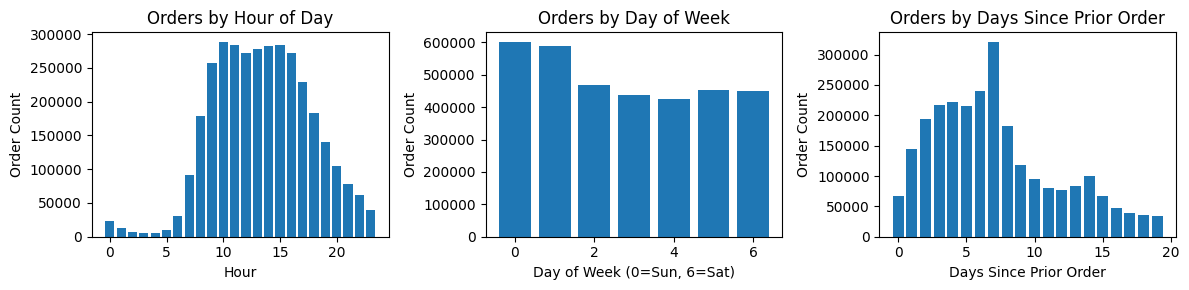

In [7]:
# Q 7: 

import pandas as pd
import matplotlib.pyplot as plt

# 1. Order trends by hour of the day
hourly_trends = (
    order_metadata.groupby('order_hour_of_day')
    .size()
    .reset_index(name='order_count')
)

print("Orders by Hour of Day:")
display(hourly_trends.head())

# 2. Order trends by day of the week
dow_trends = (
    order_metadata.groupby('order_dow')
    .size()
    .reset_index(name='order_count')
)

print("\nOrders by Day of Week:")
display(dow_trends.head())


# 3. Order trends by days since prior order
days_since_trends = (
    order_metadata.dropna(subset=['days_since_prior_order'])  # Remove NaN values
    .groupby('days_since_prior_order')
    .size()
    .reset_index(name='order_count')
    .sort_values('days_since_prior_order')
)

print("\nOrders by Days Since Prior Order:")
display(days_since_trends.head(5))

# Summary statistics
print("\nSummary Statistics:")
print(f"Peak ordering hour: {hourly_trends.loc[hourly_trends['order_count'].idxmax(), 'order_hour_of_day']}")
print(f"Most popular day of week: {dow_trends.loc[dow_trends['order_count'].idxmax(), 'order_dow']}")
print(f"Average days between orders: {order_metadata['days_since_prior_order'].mean():.1f}")

# Optional: Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Hour trends
axes[0].bar(hourly_trends['order_hour_of_day'], hourly_trends['order_count'])
axes[0].set_title('Orders by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Order Count')

# Day of week trends  
axes[1].bar(dow_trends['order_dow'], dow_trends['order_count'])
axes[1].set_title('Orders by Day of Week')
axes[1].set_xlabel('Day of Week (0=Sun, 6=Sat)')
axes[1].set_ylabel('Order Count')

# Days since prior order (top 20)
top_days = days_since_trends.head(20)
axes[2].bar(top_days['days_since_prior_order'], top_days['order_count'])
axes[2].set_title('Orders by Days Since Prior Order')
axes[2].set_xlabel('Days Since Prior Order')
axes[2].set_ylabel('Order Count')

plt.tight_layout()
plt.show()

# Advance analysis

In [2]:
order_item = order_item.merge(product_cat[["product_id","product_name"]], on="product_id", how="left")
transactions = order_item.groupby("order_id")["product_name"].apply(list).tolist()

In [3]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

In [4]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

freq_itemsets = fpgrowth(df_onehot, min_support=0.01, use_colnames=True)
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)

MemoryError: Unable to allocate 4.78 GiB for an array with shape (39123, 131209) and data type bool